In [1]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model
!git clone https://github.com/snoop2head/Fun_Cool_Sexy_Damedane

Cloning into 'first-order-model'...
remote: Enumerating objects: 393, done.
remote: Total 393 (delta 0), reused 0 (delta 0), pack-reused 393 (from 1)
Receiving objects: 100% (393/393), 72.19 MiB | 11.60 MiB/s, done.
Resolving deltas: 100% (203/203), done.
Updating files: 100% (48/48), done.
Cloning into 'Fun_Cool_Sexy_Damedane'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 49 (delta 5), reused 1 (delta 1), pack-reused 43 (from 1)
Receiving objects: 100% (49/49), 9.36 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
!pip install PyDrive

## Get .tar files, mount to Google Colab

In [3]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('./data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1LOhNjbDUFMDxqWvzlaJeN2JVytuHEPzd' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

## Make meme video

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread("./Fun_Cool_Sexy_Damedane/zyde.jpg")
driving_video = imageio.mimread("./Fun_Cool_Sexy_Damedane/dame_da_ne_source.mp4")

#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani


HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
%cd first-order-model

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml',
                            checkpoint_path='../data/vox-cpk.pth.tar')

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

## Add music to mp4 file

In [ ]:
! pip install imageio-ffmpeg moviepy

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from moviepy.editor import VideoFileClip, vfx, AudioFileClip, CompositeAudioClip


print('Speeding video up by 1.5x')
import_path = '../generated.mp4'
clip = VideoFileClip(import_path)
finalclip = clip.fx(vfx.speedx, 3)

print('Adding Background Music')
audio = AudioFileClip('../Fun_Cool_Sexy_Damedane/audio.mp3')
print('Exporting final clip')
finalclip = finalclip.set_audio(audio)

export_path = '../generated_with_sound.mp4'
finalclip.write_videofile(export_path)
print(f'video exported as {export_path}')

### Download the meme from the left panel!

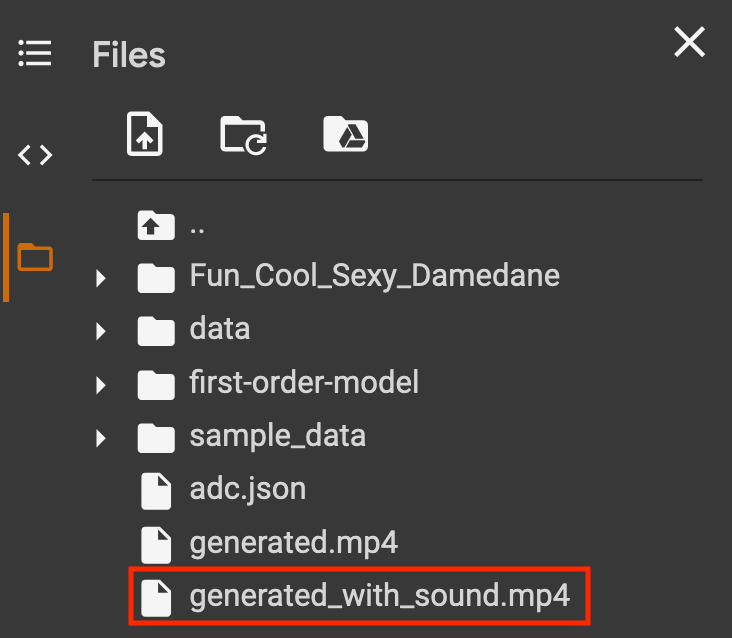